In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve,precision_recall_fscore_support,auc

In [43]:
df=pd.read_csv("Task 1 Data set/cleaned_data.csv")
df.drop(["ID","EDUCATION_CAT"],axis=1,inplace=True)
X, Y = df.drop("default payment next month",axis=1), df["default payment next month"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=2)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19998 entries, 21662 to 23720
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   LIMIT_BAL        19998 non-null  int64
 1   SEX              19998 non-null  int64
 2   EDUCATION        19998 non-null  int64
 3   MARRIAGE         19998 non-null  int64
 4   AGE              19998 non-null  int64
 5   PAY_1            19998 non-null  int64
 6   PAY_2            19998 non-null  int64
 7   PAY_3            19998 non-null  int64
 8   PAY_4            19998 non-null  int64
 9   PAY_5            19998 non-null  int64
 10  PAY_6            19998 non-null  int64
 11  BILL_AMT1        19998 non-null  int64
 12  BILL_AMT2        19998 non-null  int64
 13  BILL_AMT3        19998 non-null  int64
 14  BILL_AMT4        19998 non-null  int64
 15  BILL_AMT5        19998 non-null  int64
 16  BILL_AMT6        19998 non-null  int64
 17  PAY_AMT1         19998 non-null  int64
 18  PA

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [44]:
model = LogisticRegression()
model.fit(X_train,Y_train)

/home/suryanshmishra/Projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [61]:
y_preds = model.predict(X_test)
y_probs=model.predict_proba(X_test)
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.34267812, 0.03122709, 0.13383987, ..., 0.32289978, 0.00920265,
       0.17829984])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [46]:
roc_auc_score(Y_test, y_probs_positive)

0.6535817586446536

_________________________________________________________________________
**Now, plot the ROC curve.**


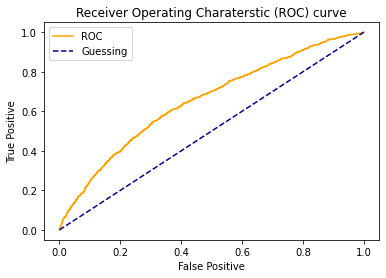

In [47]:
precision, recall, threshold = roc_curve(Y_test, y_probs_positive)
def plot_roc_curve(p,r):
    '''
    Plots ROC curve given the Precision and Recall of a Set.
    '''
    plt.plot(p,r,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing') # Baseline
    plt.ylabel("True Positive")
    plt.xlabel("False Positive")
    plt.title("Receiver Operating Charaterstic (ROC) curve")
    plt.legend()
    plt.show()
plot_roc_curve(precision,recall)

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [52]:
precision_recall_fscore_support(Y_test,y_preds)

(array([0.77072072, 0.16666667]),
 array([9.99026859e-01, 6.54450262e-04]),
 array([0.87014748, 0.00130378]),
 array([5138, 1528]))

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


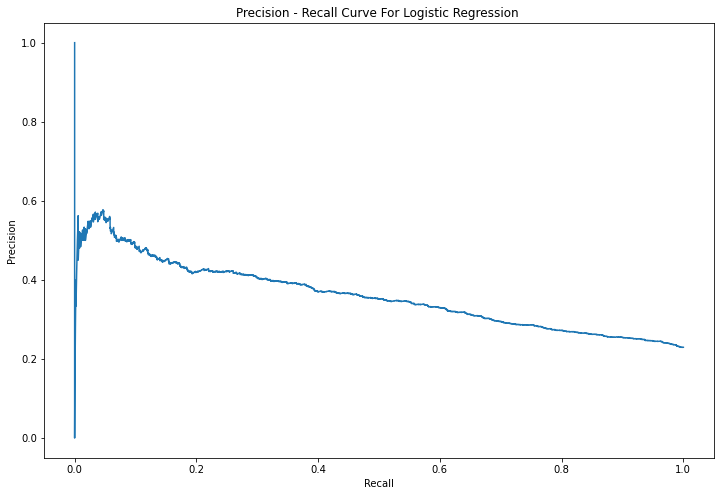

In [55]:
precision,recall,thresholds=precision_recall_curve(Y_test,y_probs_positive)
plt.figure(figsize=(12,8))
plt.title('Precision - Recall Curve For Logistic Regression ')
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [60]:
auc(recall,precision)

0.3584428764307102

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [64]:
Y_trian_proba = model.predict_proba(X_train)
roc_auc_score(Y_train,Y_trian_proba[:,1])


0.6538543652450165

    How is this different, conceptually and quantitatively, from your earlier calculation?
